<a href="https://colab.research.google.com/github/hadilbelhadjhassin/gomycode/blob/main/K_means_%26_Hierarchical_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [73]:
data=pd.read_csv("CC GENERAL.csv")

In [74]:
data.drop(["CUST_ID"], axis = 1, inplace=True)

In [75]:
data[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [76]:
data[['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']].nunique()

CASH_ADVANCE_TRX     65
PURCHASES_TRX       173
TENURE                7
dtype: int64

In [77]:
data.MINIMUM_PAYMENTS  = data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mean()) 

In [78]:
data.CREDIT_LIMIT      = data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.mean())

In [79]:
data.isnull().sum().sort_values(ascending=False).head()

BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64

In [80]:
data.isnull().sum().sort_values(ascending=False).head()


BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64

In [81]:
data.columns= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCH_FREQ',
       'PURCH_INST_FREQ', 'CASH_ADVANCE_FREQ',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
hier_cluster = linkage(data_std, method='ward')

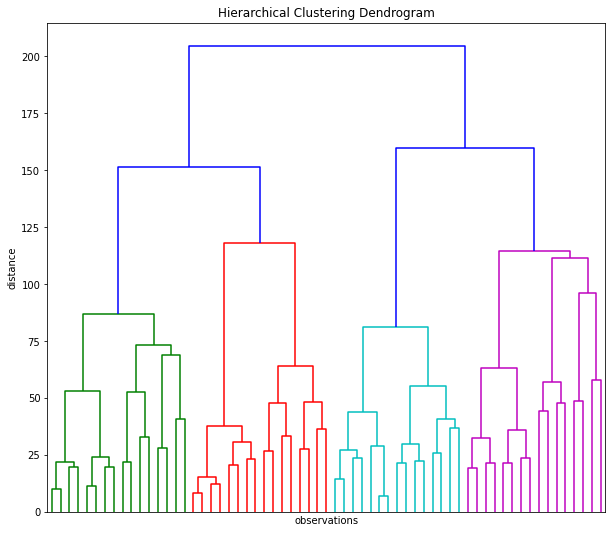

In [52]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('observations')
plt.ylabel('distance')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


In [ ]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
8945,1
8946,1
8947,1
8948,1


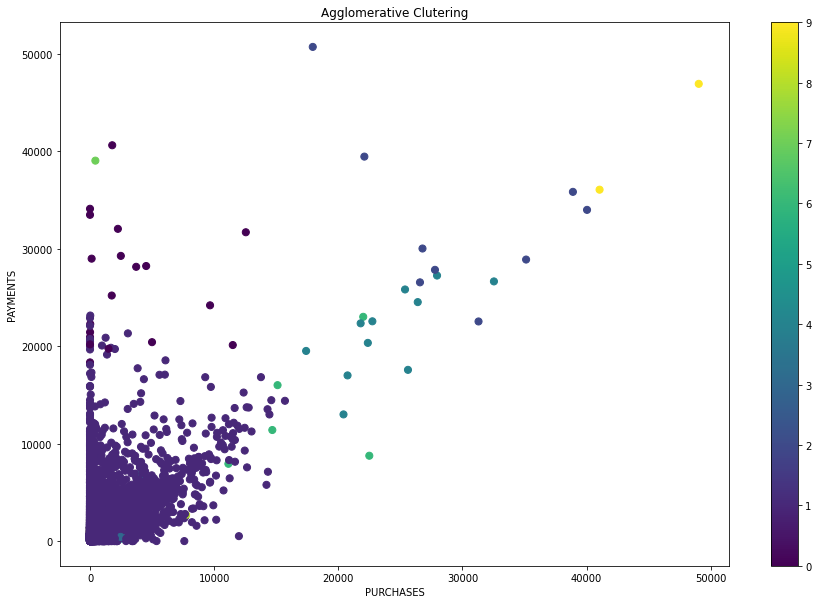

In [86]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PURCHASES'] , data ["PAYMENTS"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)

In [ ]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,2
1,3
2,0
3,0
4,2
...,...
8945,2
8946,2
8947,2
8948,2


In [ ]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[1.64537108e+03 9.06571096e-01 1.45419148e+03 9.06744948e+02
  5.47837125e+02 8.37160309e+02 5.79867638e-01 3.29338718e-01
  4.01525477e-01 1.16996605e-01 2.74395161e+00 2.08137097e+01
  6.83100257e+03 2.00861580e+03 6.51292434e+02 1.96350019e-01
  1.17564516e+01]
 [4.77562301e+03 9.07656920e-01 1.17303879e+04 8.39438634e+03
  3.33619804e+03 5.15643806e+03 7.66152580e-01 6.22972723e-01
  6.10439875e-01 2.05018920e-01 8.76785714e+00 8.89910714e+01
  1.26651786e+04 1.90125148e+04 2.44038946e+03 3.56370107e-01
  1.18571429e+01]
 [7.90668870e+02 8.48861241e-01 4.87194995e+02 2.33808544e+02
  2.53687507e+02 4.86816632e+02 4.46712142e-01 1.26616459e-01
  3.43942985e-01 1.10376268e-01 2.30770652e+00 9.21604140e+00
  2.19408273e+03 8.77458997e+02 5.31582199e+02 1.45499032e-01
  1.13716503e+01]
 [5.47822012e+03 9.57426814e-01 1.53169429e+03 9.44610426e+02
  5.87159001e+02 3.83993108e+03 4.72730906e-01 2.67277979e-01
  3.49923368e-01 3.29140566e-01 9.69023569e+00 2.15005612e+01
  1.09480971e+04

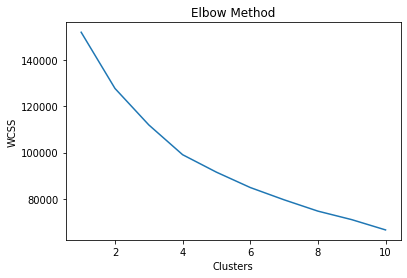

In [ ]:
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

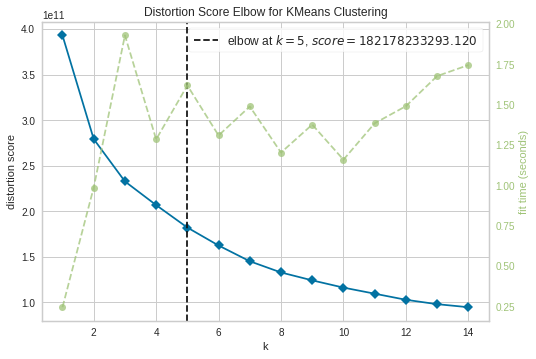

In [89]:
from yellowbrick.cluster import KElbowVisualizer

vis_elbow = KElbowVisualizer(kmeans, k = (1, 15)) # instantiate the clustering model and visualizer
vis_elbow.fit(data) # fit the data to the visualizer
vis_elbow.show()

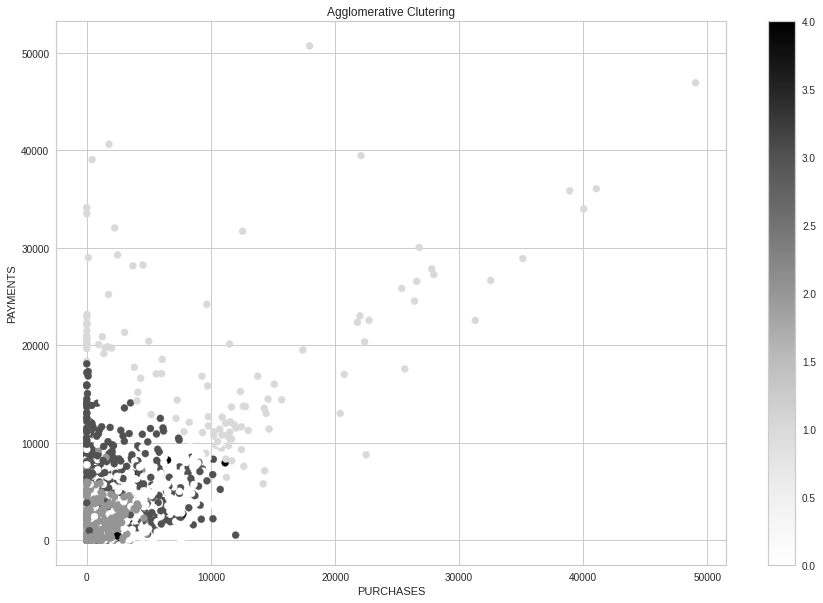

In [90]:
# plotting the clusters
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (data ["PURCHASES"] , data ["PAYMENTS"] , c= labels[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)
plt.show()


           comp_1       comp_2
0    -4326.383956   921.566884
1     4118.916676 -2432.846347
2     1497.907660 -1997.578692
3     1394.548556 -1488.743450
4    -3743.351874   757.342659
...           ...          ...
8945 -4208.357938  1122.443274
8946 -4123.924001   951.683803
8947 -4379.444202   911.504566
8948 -4791.117744  1032.540944
8949 -3623.702749  1555.134769

[8950 rows x 2 columns]


Text(0.5, 1.0, 'K_means')

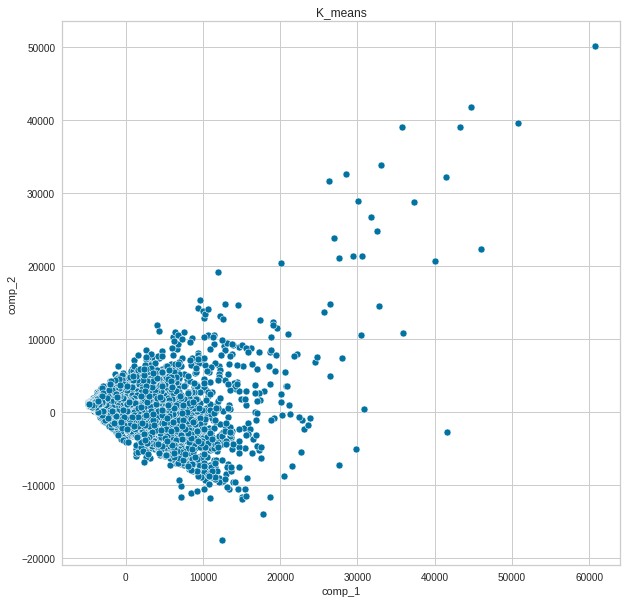

In [97]:
# dimension reduction method
import seaborn as sns
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(data)
pca_dataframe = pd.DataFrame(data = principal_comp,columns = ['comp_1','comp_2'])


plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_dataframe, x='comp_1', y='comp_2', palette="viridis")
plt.title('K_means')
